# Getting input
saving Adjacency matrix with weight of edges

In [2]:
graph = []
n = int(input("Number of cities: "))

for i in range(n):
    l = [0 for i in range(n)]
    graph.append(l)

l=list(map(int, input().split()))
cnt = 0
for i in range(n-1):
    for j in range(n-1-i):
        graph[i][j+i+1] = l[cnt]
        graph[j+i+1][i] = l[cnt]
        cnt += 1

#sample view
for i in range(4):
    for j in range(4):
        print(graph[i][j], end=' ')
    print('\n')


Number of cities: 29
97 205 139  86  60 220  65 111 115 227  95  82 225 168 103 266 205 149 120  58 257 152  52 180 136  82  34 145 129 103  71 105 258 154 112  65 204 150  87 176 137 142 204 148 148  49  41 211 226 116 197  89 153 124  74 219 125 175 386 269 134 184 313 201 215 267 248 271 274 236 272 160 151 300 350 239 322  78 276 220  60 167 182 180 162 208  39 102 227  60  86  34  96 129  69  58  60 120 119 192 114 110 192 136 173 173  51 296 150  42 131 268  88 131 245 201 175 275 218 202 119  50 281 238 131 244  51 166  95  69 279 114  56 150 278  46 133 266 214 162 302 242 203 146  67 300 205 111 238  98 139  52 120 178 328 206 147 308 172 203 165 121 251 216 122 231 249 209 111 169  72 338 144 237 331 169 151 227 133 104 242 182  84 290 230 146 165 121 270  91  48 158 200  39  64 210 172 309  68 169 286 242 208 315 259 240 160  90 322 260 160 281  57 192 107  90 140 195  51 117  72 104 153  93  88  25  85 152 200 104 139 154 134 149 135 320 146  64  68 143 106  88  81 159 219 

# Creating random chromosomes
generating a random permutation 

In [3]:
import random
def first_population(number_of_samples, size):
    l = []
    for i in range(number_of_samples):
        chromosome = []
        for j in range(size):
            a = random.randint(0,size-1)
            while a in chromosome:
                a = random.randint(0,size-1)
            chromosome.append(a)
        l.append(chromosome)
    return l

first_population(3,5)
                

[[0, 4, 1, 2, 3], [1, 2, 0, 4, 3], [1, 2, 4, 3, 0]]

# Fitness function (sum of weights in chromosome path)

In [4]:
def fitness(chromosome):
    w = 0
    for i in range(len(chromosome)):
        w += graph[chromosome[i]][chromosome[(i+1) % len(chromosome)]]
    return w

chromosome = first_population(1,29)[0]
print(chromosome)
print(fitness(chromosome))

[24, 5, 1, 8, 18, 2, 20, 9, 4, 22, 25, 13, 11, 6, 3, 10, 14, 16, 23, 15, 7, 17, 0, 26, 28, 27, 12, 21, 19]
5091


# Cross over(ordered crossover)

In [40]:
def cross_over(parent1, parent2):
    
    size = len(parent1)
    # result
    res = [-1 for i in range(size)]
    a = random.randint(0, size-1)
    b = -1
    while b == a or b == -1:
        b = random.randint(0, size-1)
    if (a > b):
        a, b = b, a
    # putting parent1 genes
    i = a
    while i != b:
        res[i] = parent1[i]
        i = (i + 1) % size
        
    # putting parent2 genes
    cnt = 0
    i = b
    while cnt < size:

        if parent2[cnt] not in res:
            res[i] = parent2[cnt]
            i = (i + 1) % size
        cnt += 1
        
        
    return res
parents = first_population(2,5)
print(parents)
print(cross_over(parents[0], parents[1]))
        

[[4, 3, 1, 2, 0], [3, 4, 0, 1, 2]]
[0, 3, 1, 2, 4]


# Mutation

In [6]:
def mutation(chromosome, mutation_rate):
    for i in range(len(chromosome)):
        if (random.random() < mutation_rate):
            x = random.randint(0,len(chromosome)-1)
            # swap:
            chromosome[i], chromosome[x] = chromosome[x], chromosome[i]  
    return chromosome

print(mutation([1,2,3,4,5], 0.5))

[3, 5, 4, 1, 2]


# Main Function

in every iteration i printed the two best answers (weight) in next expriments they are comment(so there is no more printing just showing the plot...)
at first my answers didn't converge to enything and the plot was like a sin(x) graph. (the first examines were like second plot below. then i tried to change numbers but nothing changed. first tries were somthing like *genentic(100, 100, 0.1, 20) and genentic(1000, 100, 0.5, 20) and ...)
*genentic(iterations, population_number, mutation_rate, elite_size)

then i radicaly changed almost evrything to be more stable like below:
genentic(100, 1000, 0.01, 100) mutation rate was 10times bigger and elite size waz 10times smaller...
and you can see the result plot that finaly converged!


0
3765 3770
1
3621 3622
2
3549 3577
3
3447 3462
4
3230 3447
5
3230 3403
6
3230 3281
7
3282 3334
8
3282 3334
9
3166 3282
10
3132 3166
11
3001 3132
12
2938 2952
13
2938 2952
14
2938 2952
15
2938 2952
16
2885 2952
17
2885 2952
18
2885 2957
19
2957 2996
20
2923 2957
21
2923 2953
22
2923 2953
23
2732 2953
24
2732 2812
25
2732 2812
26
2812 2863
27
2799 2809
28
2747 2799
29
2747 2809
30
2747 2809
31
2747 2777
32
2747 2752
33
2747 2765
34
2776 2777
35
2776 2777
36
2705 2724
37
2443 2705
38
2443 2705
39
2443 2687
40
2443 2586
41
2283 2443
42
2246 2283
43
2246 2283
44
2246 2283
45
2246 2283
46
2246 2380
47
2246 2441
48
2246 2441
49
2246 2454
50
2246 2423
51
2246 2290
52
2290 2423
53
2290 2423
54
2290 2423
55
2290 2423
56
2290 2424
57
2290 2306
58
2290 2306
59
2290 2306
60
2290 2290
61
2290 2290
62
2280 2290
63
2280 2306
64
2306 2311
65
2306 2311
66
2306 2311
67
2306 2346
68
2306 2346
69
2306 2346
70
2306 2350
71
2306 2350
72
2350 2355
73
2350 2355
74
2272 2340
75
2272 2340
76
2272 2340
77
2074 2

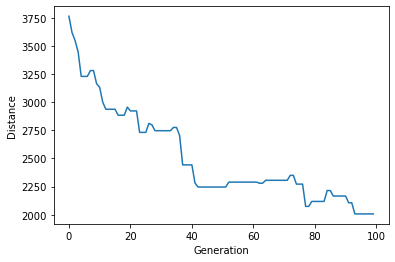

In [43]:
import matplotlib.pyplot as plt
def reverse(l):
    return float(1) / float(l)

def genentic(iterations, population_number, mutation_rate, elite_size):
    population = first_population(population_number, n)
    progress = []
    for i in range(iterations):
        print(i)
        population.sort(key = fitness)
        print(fitness(population[0]), fitness(population[1]))
        progress.append(fitness(population[0]))
        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        while(len(select) < population_number - elite_size):
            for j in range(population_number):
                if (random.random() < normalized_fitness[j] / sum_fitness):
                    select.append(population[j])
        # making new child from selected parents
        j = 0
        #print(select)
        while (len(child) < population_number):
            child.append(cross_over(select[j], select[len(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(population_number):
            child[j] = mutation(child[j], mutation_rate)
        population = child
    
    population.sort(key = fitness)
    print(population[0], fitness(population[0]))
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
genentic(100, 1000, 0.01, 100)

0
3612 3678
1
3495 3610
2
3343 3546
3
3445 3469
4
3591 3606
5
3450 3560
6
3556 3560
7
3342 3358
8
3542 3572
9
3437 3460
10
3417 3444
11
3466 3515
12
3573 3598
13
3343 3432
14
3560 3579
15
3490 3648
16
3238 3415
17
3246 3471
18
3238 3246
19
3492 3555
20
3638 3689
21
3650 3686
22
3410 3546
23
3427 3482
24
3524 3584
25
3586 3608
26
3430 3572
27
3532 3669
28
3543 3596
29
3633 3653
30
3493 3588
31
3365 3509
32
3483 3659
33
3481 3596
34
3579 3631
35
3401 3549
36
3260 3598
37
3330 3539
38
3540 3569
39
3577 3595
40
3532 3676
41
3525 3532
42
3379 3716
43
3562 3564
44
3147 3549
45
3131 3415
46
3305 3453
47
3227 3431
48
3441 3503
49
3457 3607
50
3450 3497
51
3412 3539
52
3437 3633
53
3471 3595
54
3561 3579
55
3507 3522
56
3522 3552
57
3563 3565
58
3550 3552
59
3443 3474
60
3539 3604
61
3501 3633
62
3434 3522
63
3387 3499
64
3451 3499
65
3501 3513
66
3456 3533
67
3503 3561
68
3454 3519
69
3217 3390
70
3284 3545
71
3345 3456
72
3538 3616
73
3320 3648
74
3236 3490
75
3174 3512
76
3500 3556
77
3382 3

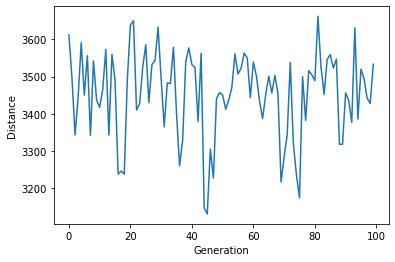

In [44]:
genentic(100, 1000, 0.1, 20)

now i take the iterations from 100 to 500 because in the last plot it seems to be decreasing in the futre iterations! this time running time of code was very longer but answer didn't change a lot.

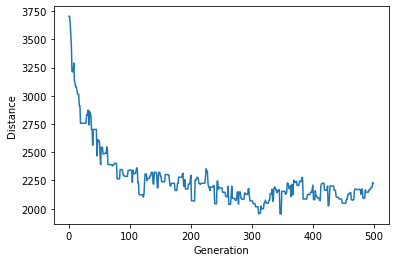

In [48]:
def genentic_just_plot(iterations, population_number, mutation_rate, elite_size):
    population = first_population(population_number, n)
    progress = []
    for i in range(iterations):
        #print(i)
        population.sort(key = fitness)
        #print(fitness(population[0]), fitness(population[1]))
        progress.append(fitness(population[0]))
        child = []
        # moving elites to next generation
        for j in range(elite_size):
            child.append(population[j])
            
        # selection based on fitness(normalize fitness)
        select = []
        normalized_fitness = [(reverse(fitness(j))) for j in population]
        reversed(population)
        sum_fitness = sum(normalized_fitness)
        while(len(select) < population_number - elite_size):
            for j in range(population_number):
                if (random.random() < normalized_fitness[j] / sum_fitness):
                    select.append(population[j])
        # making new child from selected parents
        j = 0
        #print(select)
        while (len(child) < population_number):
            child.append(cross_over(select[j], select[len(select) - 1 - j]))
            j = (j + 1) % len(select)
        # mutate next generation
        for j in range(population_number):
            child[j] = mutation(child[j], mutation_rate)
        population = child
    
    population.sort(key = fitness)
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
genentic_just_plot(500, 1000, 0.01, 100)   

so this time i changed the number of iterations back to first value and increased the size of population

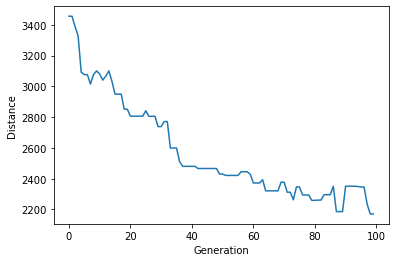

In [49]:
genentic_just_plot(100, 2000, 0.01, 100)

this time i changed the mutation rate to 10times smaller and this time was the best answer so far!

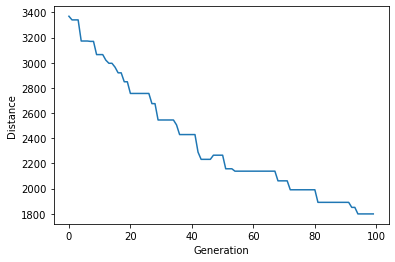

In [50]:
genentic_just_plot(100, 1000, 0.001, 100)

and now increasing the elite size x2.even beat the previous result!

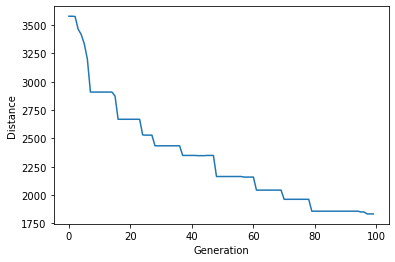

In [51]:
genentic_just_plot(100, 1000, 0.001, 200)

elite*2 and iteratio*2 again  better result!

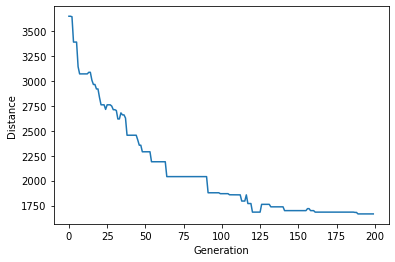

In [52]:
genentic_just_plot(200, 1000, 0.001, 400)

I end my exprience with this plot that looks like a human face :)) and i think it can't get better result... 

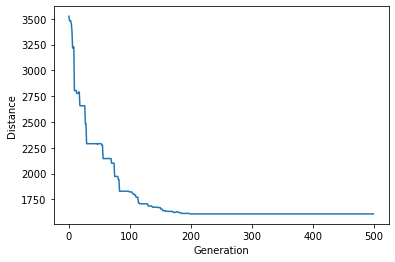

In [57]:
genentic_just_plot(500, 1000, 0.001, 400)

0
3642 3753
1
3642 3734
2
3642 3670
3
3559 3642
4
3467 3481
5
3111 3328
6
3111 3401
7
3111 3376
8
3111 3376
9
2810 3111
10
2810 3111
11
2810 3055
12
2810 3055
13
2810 2892
14
2810 2892
15
2810 2916
16
2810 2849
17
2810 2849
18
2810 2849
19
2810 2849
20
2810 2820
21
2810 2820
22
2779 2810
23
2779 2783
24
2779 2783
25
2779 2783
26
2777 2779
27
2690 2777
28
2680 2690
29
2664 2680
30
2646 2664
31
2546 2551
32
2546 2551
33
2546 2551
34
2546 2551
35
2516 2527
36
2513 2516
37
2410 2473
38
2410 2471
39
2326 2410
40
2326 2410
41
2326 2410
42
2326 2332
43
2326 2332
44
2326 2332
45
2332 2407
46
2290 2332
47
2290 2332
48
2290 2332
49
2290 2332
50
2290 2332
51
2290 2332
52
2290 2332
53
2244 2267
54
2244 2267
55
2244 2267
56
2232 2244
57
2232 2244
58
2211 2232
59
2211 2232
60
2211 2232
61
2211 2232
62
2211 2211
63
2178 2211
64
1978 2140
65
1978 2140
66
1978 2140
67
1978 2087
68
1978 2087
69
1978 2035
70
2035 2087
71
2035 2140
72
2035 2044
73
2035 2044
74
2035 2044
75
2035 2044
76
2035 2044
77
2006 2

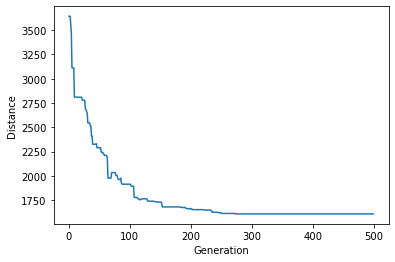

In [59]:
genentic(500, 1000, 0.001, 400)

[14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23, 0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3] 1610
so this is my approximate answer for bayg29